# 1. Let's load needed libraries

In [2]:
# we import the library pandas and give it the "pd" kickname
import pandas as pd

# 2. Let's load the gapminder dataset

In [5]:
# we use pandas.read_csv() function to access the file "gapminder.tsv" stored in a remote location 

# the remote location is: https://raw.githubusercontent.com/thousandoaks/BEMM458/master/data/

# with the argument sep='\t' we indicate that the columns are separated by tabs rather than commas.

df = pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458/master/data/gapminder.tsv', sep='\t')



### df is a DataFrame.
### DataFrames are core entities in data analytics

In [7]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [8]:
type(df)

pandas.core.frame.DataFrame

# 3. Let's observe our data

In [9]:
# we show the first 5 rows
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [13]:
# we show the size of our dataset
df.shape

(1704, 6)

In [11]:
# we get some more detailed info on our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [15]:
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


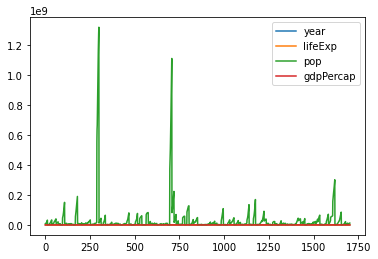

In [16]:
df.plot()

## 3.1. Let's extract some columns from our data

In [17]:
# we can extract a column by its name
df['country']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [18]:
# we can extract several columns at the same time
df[['country','lifeExp']]

,country,lifeExp
0,Afghanistan,28.801
1,Afghanistan,30.332
2,Afghanistan,31.997
3,Afghanistan,34.020
4,Afghanistan,36.088
...,...,...
1699,Zimbabwe,62.351
1700,Zimbabwe,60.377
1701,Zimbabwe,46.809
1702,Zimbabwe,39.989


## 3.2. Let's extract some rows from our data

In [19]:
# let's extract the first row. Python starts counting from zero
df.iloc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [22]:
# let's extract the 100th row. Python starts counting from zero
df.iloc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object

In [21]:
# we can even select multiple rows

df.iloc[[0,99,999]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
999,Mongolia,Asia,1967,51.253,1149500,1226.041130


In [20]:
df[df['year']>1960]

,country,continent,year,lifeExp,pop,gdpPercap
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


# 4. Grouped and aggregated calculations

There are several initial questions that we can ask ourselves:
1. For each year in our data, what was the average life expectancy? What is the average life expectancy, population, and GDP?
2. What if we stratify the data by continent and perform the same calculations?
3. How many countries are listed in each continent?



## 4.1. What was the average life expectancy evolution across time ?

In [23]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [24]:
# the following command groups data by the columm "year" then extracts the column lifeExp and computes the mean
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

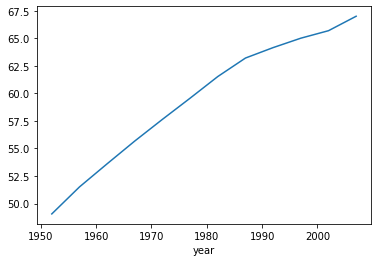

In [25]:
df.groupby('year')['lifeExp'].mean().plot()

### the following figure provides a visual representation of the operation we have just performed

<img src="https://raw.githubusercontent.com/thousandoaks/BEMM458/master/sessions/images/groupby_means.png">

## 4.2. What was the average life expectancy evolution across time AND continent ?

In [ ]:
# the following command groups data by the columm "year" AND continent then extracts the column lifeExp and computes the mean
df.groupby(['year','continent'])['lifeExp'].mean()

## 4.3. What was the average life expectancy evolution AND GDP per capita across time AND continent ?

In [ ]:
df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean()

## 4.4. How many countries are there in each continent ?

In [ ]:
df.head()

In [ ]:
#  we group by continent then extract the country column and count unique occurrences
df.groupby('continent')['country'].nunique()

# 5. Basic plotting

## 5.1. Evolution of life expectancy across time

In [ ]:
df.groupby('year')['lifeExp'].mean()

In [ ]:
# Let's save the previous operation as a new variable

lifeExpectancyEvolution=df.groupby('year')['lifeExp'].mean()

In [ ]:
# let's plot the result
lifeExpectancyEvolution.plot()

## 5.2. Evolution of life expectancy accross time and continent

In [ ]:
lifeExpectancyEvolutionContinent=df.groupby(['continent','year'])['lifeExp'].mean()

In [ ]:

lifeExpectancyEvolutionContinent.unstack(level=0).plot(kind='line', subplots=False,figsize=(10,10))

# 6. Challenge yourself ! 

## 6.1.   What was the maximum life expectancy evolution across time AND country ?

### Hint 1: use the followint command to display all rows in a pandas DataFrame

pandas.set_option('display.max_rows', None)

### Hint 2: look on the pandas documentation how to compute the maximum after a groupby operation

### https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html